#Tugas Elektrifikasi Day 2
goals dari tugas ini adalah untuk melakukan clustering (dengan k-modes) pada data csv yang telah disediakan

##Import Libraries

In [ ]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
# Install kmodes
!pip install kmodes
# Import kmodes
from kmodes.kmodes import KModes

##Import Data

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/binggas/public-dataset/main/bank%2Bmarketing/bank/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
#determine each customer based on age, job, marital, education, default, housing, and balance
df = df[["age", "job", "marital", "education", "default", "housing", "loan", "balance"]]
#show the first 5 row of the data
df.head()

,age,job,marital,education,default,housing,loan,balance
0,58,management,married,tertiary,no,yes,no,2143
1,44,technician,single,secondary,no,yes,no,29
2,33,entrepreneur,married,secondary,no,yes,yes,2
3,47,blue-collar,married,unknown,no,yes,no,1506
4,33,unknown,single,unknown,no,no,no,1


In [ ]:
#show the last 5 row of the data
df.tail()

,age,job,marital,education,default,housing,loan,balance,cluster_k-modes
45205,25,technician,single,secondary,no,no,yes,505,1
45206,51,technician,married,tertiary,no,no,no,825,2
45207,71,retired,divorced,primary,no,no,no,1729,1
45209,57,blue-collar,married,secondary,no,no,no,668,3
45210,37,entrepreneur,married,secondary,no,no,no,2971,0


In [ ]:
#check the shape of the DataFrame
print("columns: ", df.shape[1])
print("rows: ", df.shape[0])

columns:  8
rows:  45211


In [ ]:
#check how many duplicates are in the data
df.duplicated().sum()

4163

In [ ]:
#dropping the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#check again how many duplicates are in the data
df.duplicated().sum()

0

In [ ]:
#check for null value
df.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
balance,0


In [ ]:
#check the data types
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
balance,int64


In [ ]:
# list categorical columns
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# loop each element within the list to be changed into the type `category`
for col in cat_cols:
    df[col] = df[col].astype('category')

# check data types again
df.dtypes

,0
age,int64
job,category
marital,category
education,category
default,category
housing,category
loan,category
balance,int64


In [ ]:
#check unique values of each categorical column
for col in cat_cols:
    print(f'{col}:')
    print(df[col].unique())
    print('\n')

job:
['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', ..., 'services', 'self-employed', 'unemployed', 'housemaid', 'student']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student',
                          'technician', 'unemployed', 'unknown']


marital:
['married', 'single', 'divorced']
Categories (3, object): ['divorced', 'married', 'single']


education:
['tertiary', 'secondary', 'unknown', 'primary']
Categories (4, object): ['primary', 'secondary', 'tertiary', 'unknown']


default:
['no', 'yes']
Categories (2, object): ['no', 'yes']


housing:
['yes', 'no']
Categories (2, object): ['no', 'yes']


loan:
['no', 'yes']
Categories (2, object): ['no', 'yes']




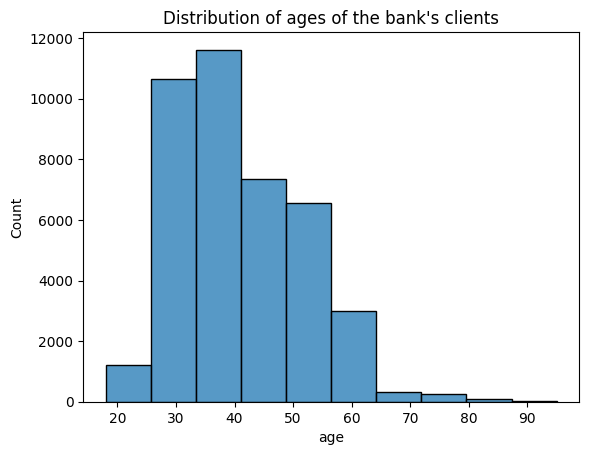

In [ ]:
# Draw plot
sns.histplot(data=df,
             x='age',
             bins=10 # Playaround with different bins number
             )

# Add title
plt.title("Distribution of ages of the bank's clients")

# Add label
plt.ylabel('Count')

# Show the plot
plt.show()

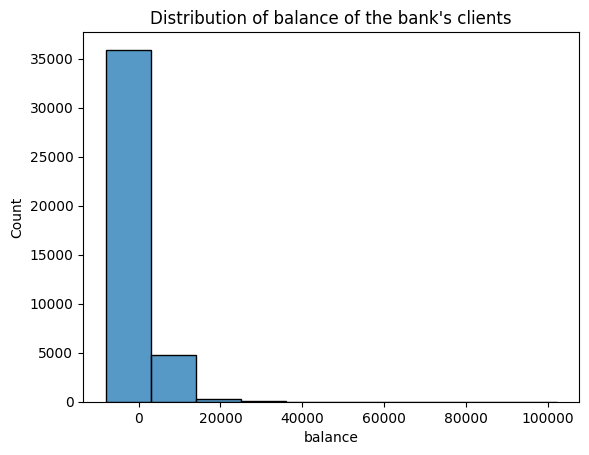

In [ ]:
# Draw plot
sns.histplot(data=df,
             x='balance',
             bins=10 # Playaround with different bins number
             )

# Add title
plt.title("Distribution of balance of the bank's clients")

# Add label
plt.ylabel('Count')

# Show the plot
plt.show()

##K-Modes Clustering

In [ ]:
data_kmodes = df.copy()
data_kmodes.head()

,age,job,marital,education,default,housing,loan,balance
0,58,management,married,tertiary,no,yes,no,2143
1,44,technician,single,secondary,no,yes,no,29
2,33,entrepreneur,married,secondary,no,yes,yes,2
3,47,blue-collar,married,unknown,no,yes,no,1506
4,33,unknown,single,unknown,no,no,no,1


In [ ]:
# Bin `balance` column into 10 bins from -8000 to 150000, change type into category
data_kmodes['balance_binned'] = pd.cut(data_kmodes['balance'], bins=[-8000, 0, 20000, 40000, 60000, 80000, 100000]).astype('category')

# Drop `balance` column
data_kmodes.drop('balance', axis=1, inplace=True)

# Bin `age` column into 10 bins from 10 to 100, change type into category
data_kmodes['age_binned'] = pd.cut(data_kmodes['age'], bins=[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]).astype('category')

# Drop `age` column
data_kmodes.drop('age', axis=1, inplace=True)

# Show first 5 rows
data_kmodes.head()

,job,marital,education,default,housing,loan,balance_binned,age_binned
0,management,married,tertiary,no,yes,no,"(0, 20000]","(50, 60]"
1,technician,single,secondary,no,yes,no,"(0, 20000]","(40, 50]"
2,entrepreneur,married,secondary,no,yes,yes,"(0, 20000]","(30, 40]"
3,blue-collar,married,unknown,no,yes,no,"(0, 20000]","(40, 50]"
4,unknown,single,unknown,no,no,no,"(0, 20000]","(30, 40]"


In [ ]:
data_kmodes.dtypes

,0
job,category
marital,category
education,category
default,category
housing,category
loan,category
balance_binned,category
age_binned,category


##One-hot encoding

In [ ]:
data_kmodes.head()

,job,marital,education,default,housing,loan,balance_binned,age_binned
0,management,married,tertiary,no,yes,no,"(0, 20000]","(50, 60]"
1,technician,single,secondary,no,yes,no,"(0, 20000]","(40, 50]"
2,entrepreneur,married,secondary,no,yes,yes,"(0, 20000]","(30, 40]"
3,blue-collar,married,unknown,no,yes,no,"(0, 20000]","(40, 50]"
4,unknown,single,unknown,no,no,no,"(0, 20000]","(30, 40]"


In [ ]:
print(data_kmodes.shape)

(41048, 8)


##Feeding data into the algorithm

In [ ]:
data_kmodes = pd.get_dummies(data_kmodes, drop_first=True)
data_kmodes.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,"balance_binned_(60000, 80000]","balance_binned_(80000, 100000]","age_binned_(20, 30]","age_binned_(30, 40]","age_binned_(40, 50]","age_binned_(50, 60]","age_binned_(60, 70]","age_binned_(70, 80]","age_binned_(80, 90]","age_binned_(90, 100]"
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
print(data_kmodes.shape)

(41048, 32)


In [ ]:
n_clusters = list(range(2, 9))
costs = []

# fix this code
for n in n_clusters:
    kmodes = KModes(n_clusters=n, init='random', n_init=10, max_iter=500, random_state=42)
    kmodes.fit(data_kmodes)
    cost = kmodes.cost_
    costs.append(cost)

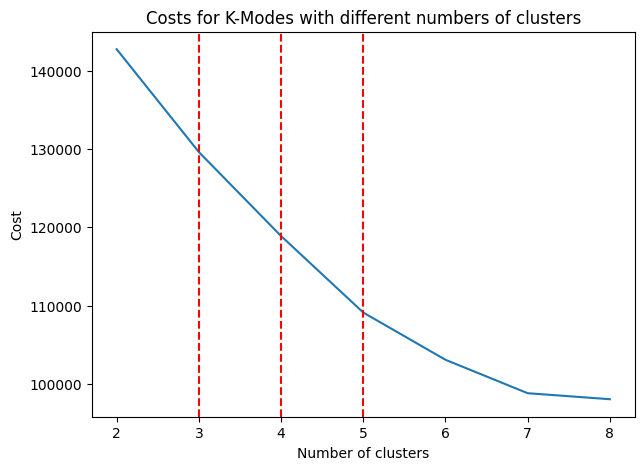

In [ ]:
plt.figure(figsize=(7,5))
plt.plot(n_clusters, costs)
plt.axvline(3, linestyle='--', c='r')
plt.axvline(4, linestyle='--', c='r')
plt.axvline(5, linestyle='--', c='r')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Costs for K-Modes with different numbers of clusters')
plt.show()

pilih yang ke-5 karena sikunya lebih terlihat
##Label the Original Data

In [ ]:
kmodes = KModes(n_clusters=4, init='random', n_init=10, max_iter=500, random_state=42)
df['cluster_k-modes'] = kmodes.fit_predict(data_kmodes)

Explore Each Varible from Every Cluster

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

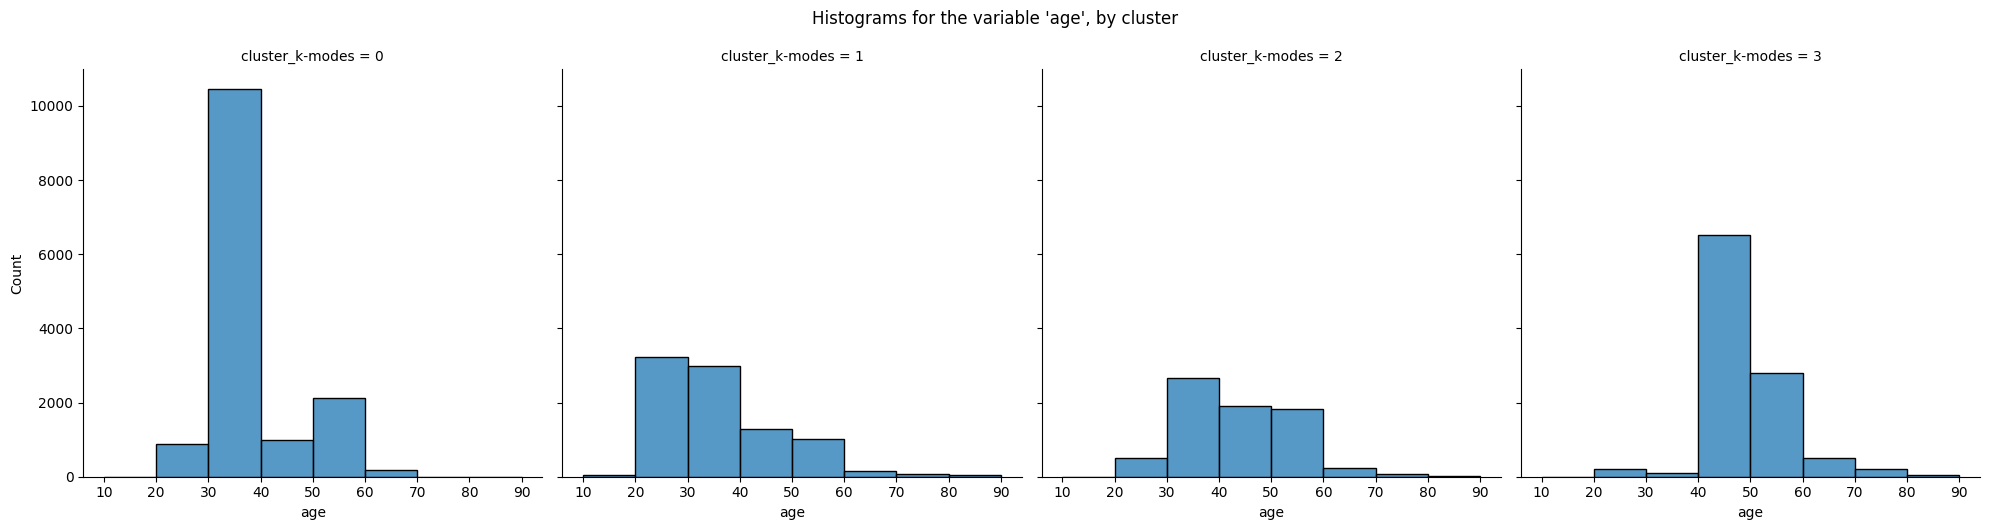

In [ ]:
#age
g = sns.displot(data=df,
                x='age',
                col='cluster_k-modes',
                bins=[10, 20, 30, 40, 50, 60, 70, 80, 90]
                )

g.fig.suptitle("Histograms for the variable 'age', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

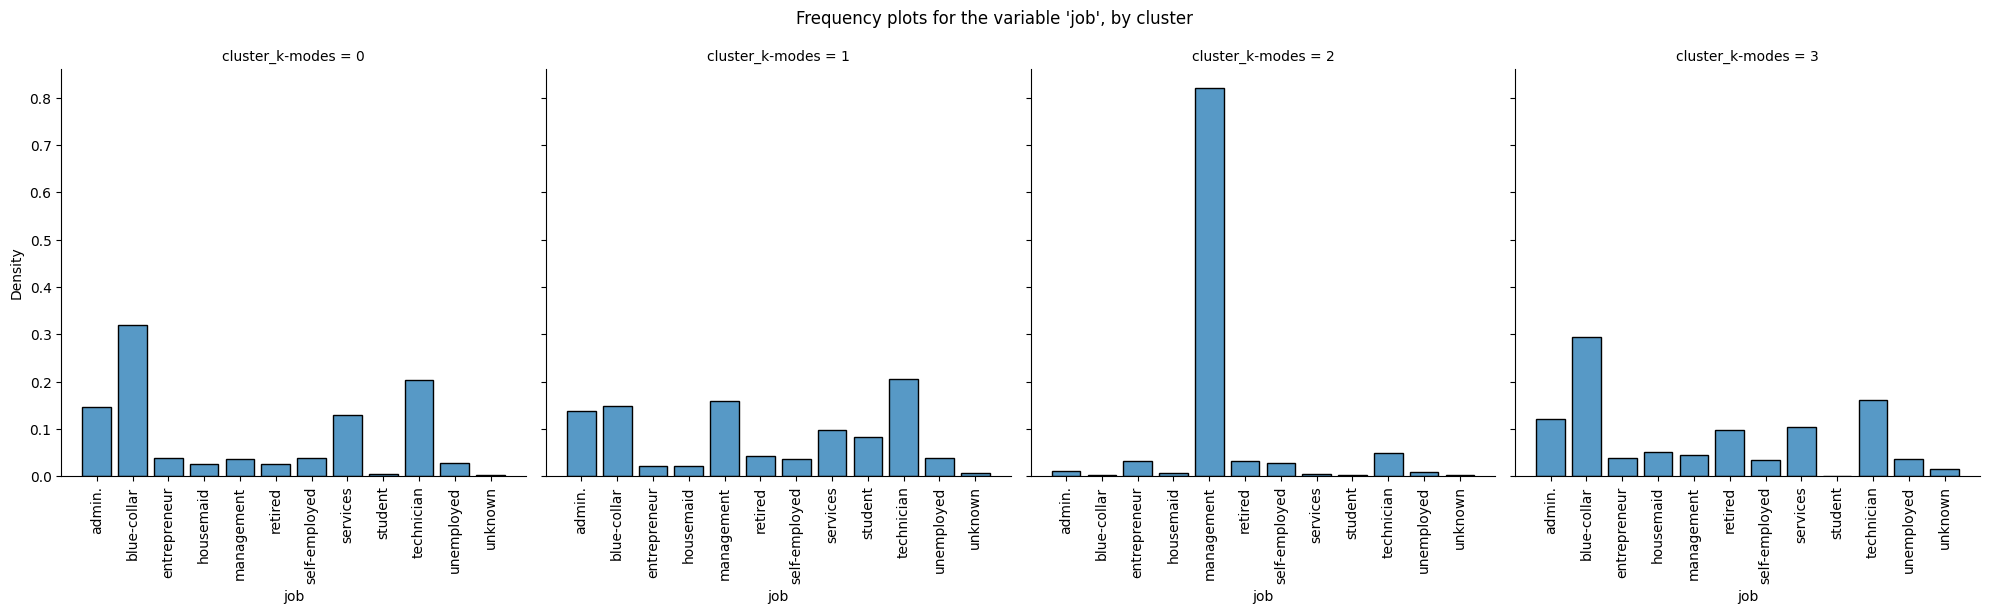

In [ ]:
# Job
g = sns.displot(data=df,
                x='job',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xticklabels(rotation=90)

g.fig.suptitle("Frequency plots for the variable 'job', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

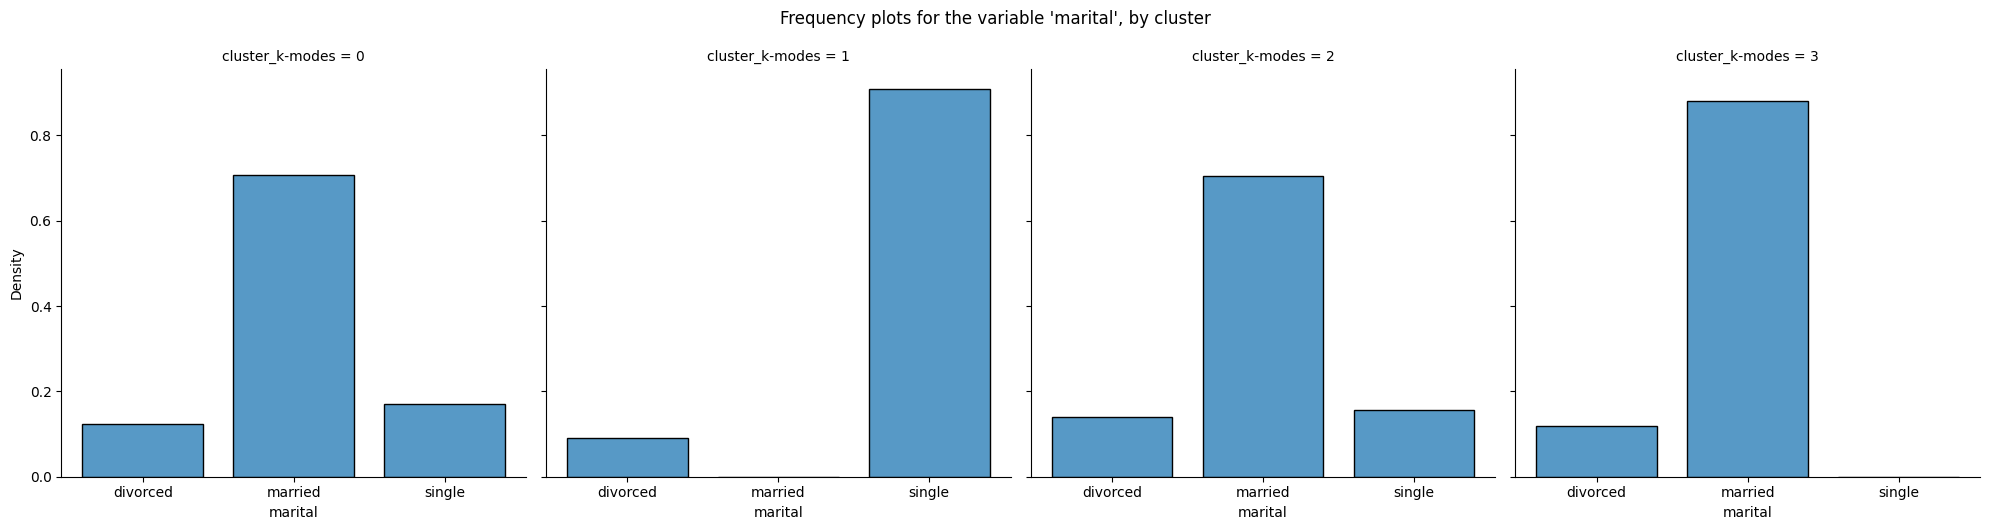

In [ ]:
# Marital
g = sns.displot(data=df,
                x='marital',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'marital', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

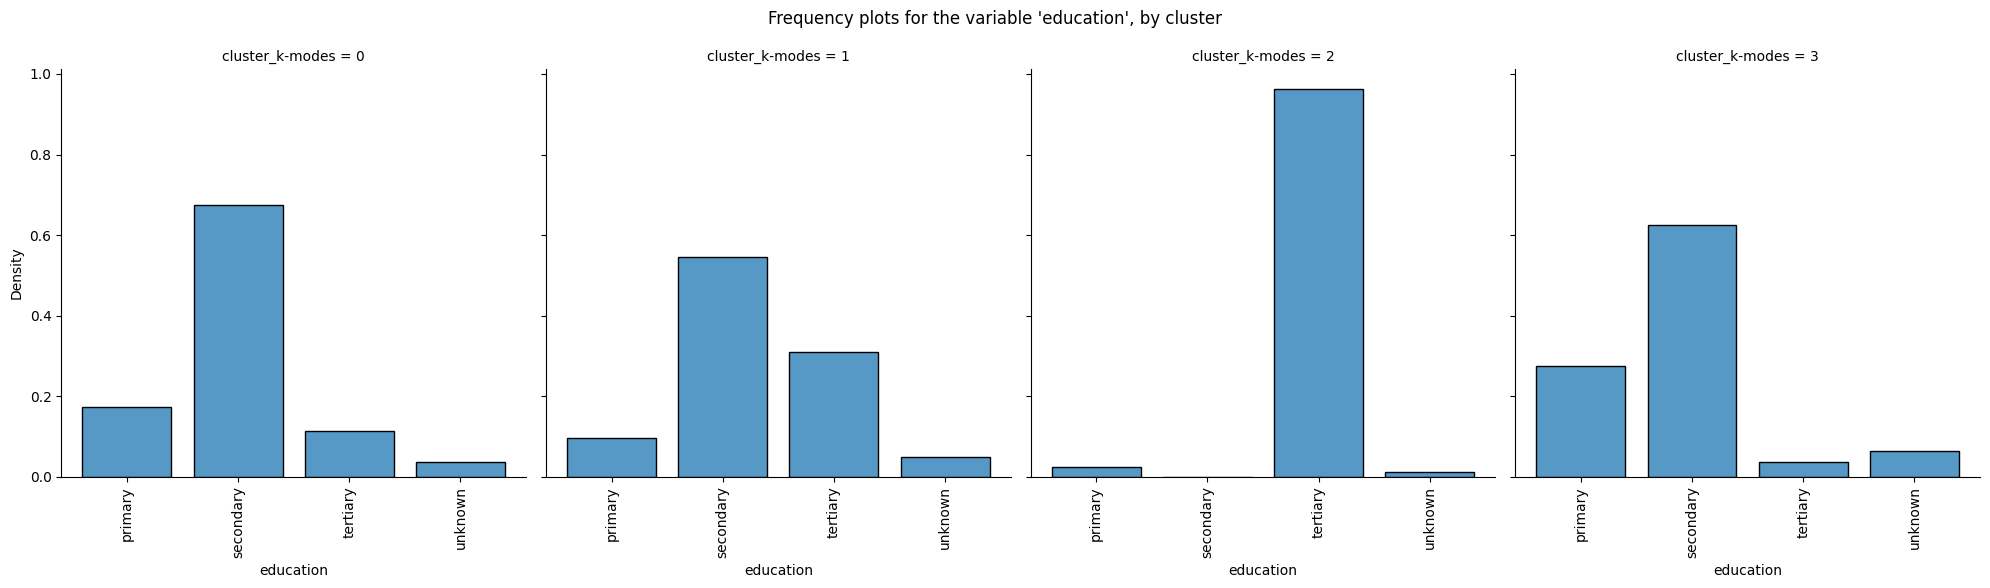

In [ ]:
# Education
g = sns.displot(data=df,
                x='education',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.set_xticklabels(rotation=90)

g.fig.suptitle("Frequency plots for the variable 'education', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

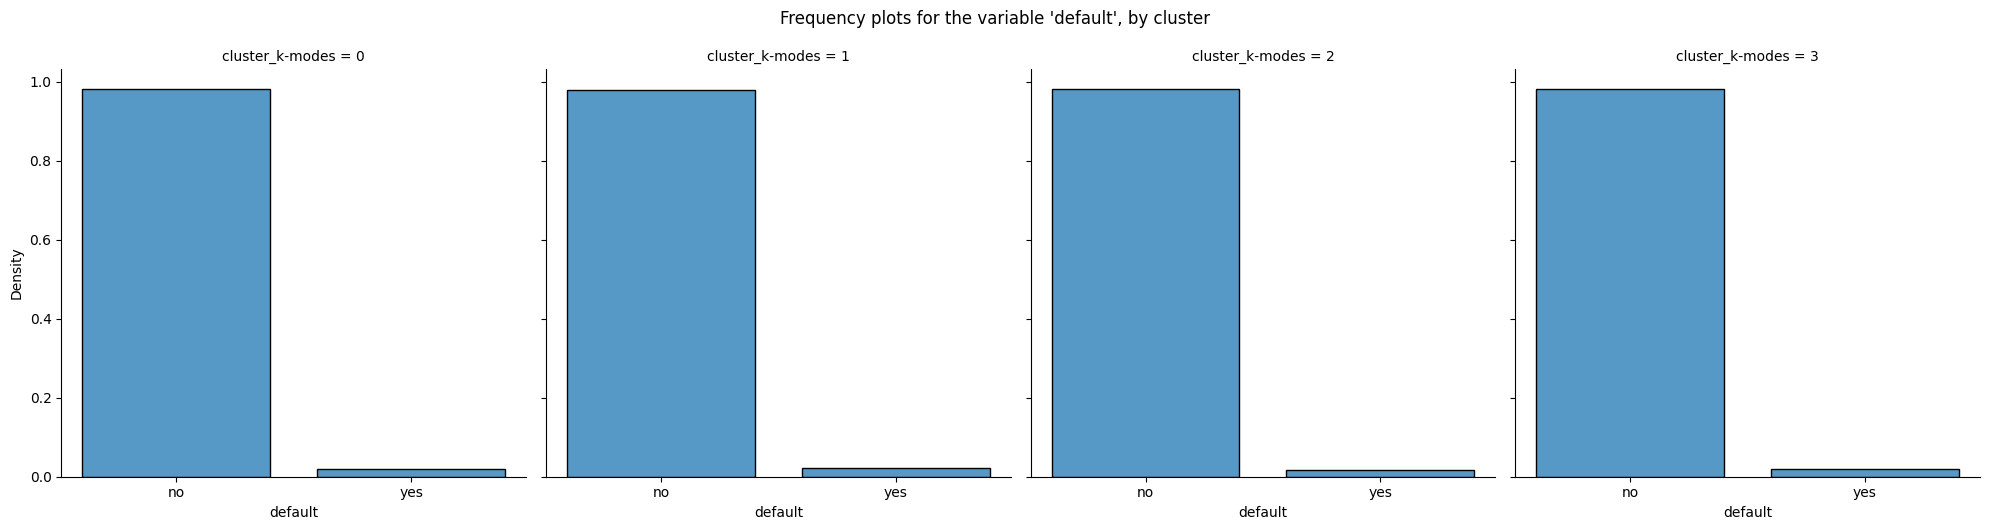

In [ ]:
# Default
g = sns.displot(data=df,
                x='default',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'default', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

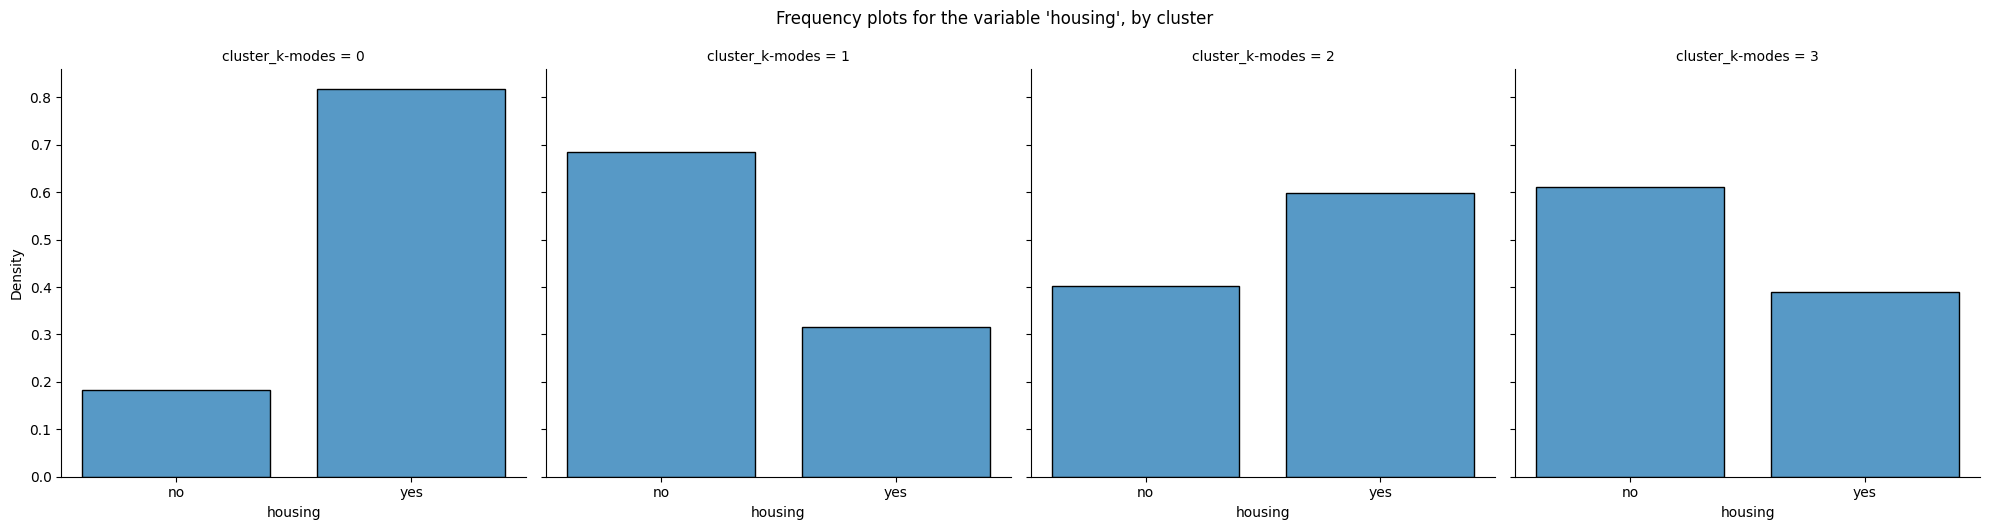

In [ ]:
# Housing
g = sns.displot(data=df,
                x='housing',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'housing', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

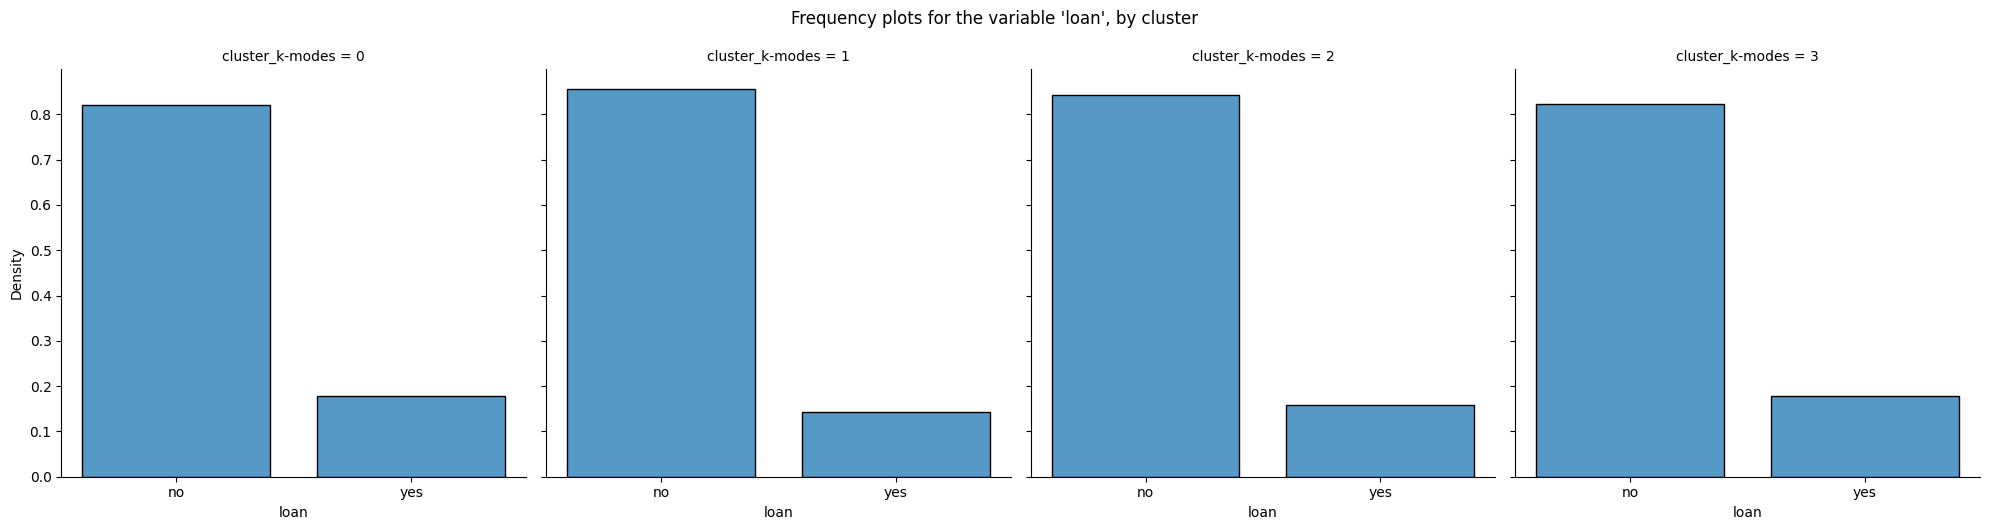

In [ ]:
# Loan
g = sns.displot(data=df,
                x='loan',
                col='cluster_k-modes',
                multiple="dodge",
                stat='density',
                shrink=0.8,
                common_norm=False)

g.fig.suptitle("Frequency plots for the variable 'loan', by cluster", y=1.05)

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

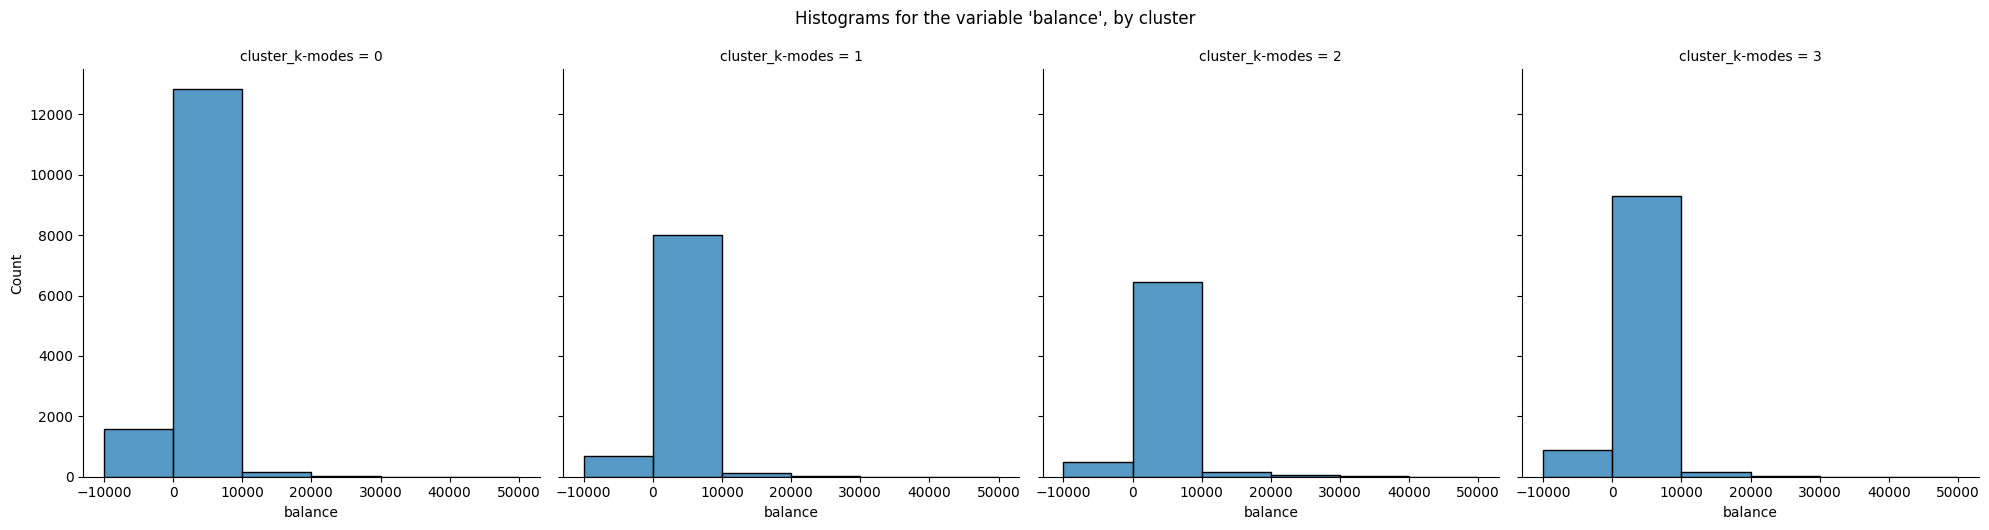

In [ ]:
#Balance

g = sns.displot(data=df,
                x='balance',
                col='cluster_k-modes',
                bins=[-10000, 0, 10000, 20000, 30000, 40000, 50000]
                )

g.fig.suptitle("Histograms for the variable 'balance', by cluster", y=1.05)

plt.show()

| Variable |1 |2 | 3| 4|
|-|-|-|-|-|
|`age`| 30-40 | 20-40 | 30-60 | 40-50 |
|`job`| blue-collar, technician, admin | technician, management, blue-collar |  management, technician, entrepreneur | blue-collar, technician, admin |
|`marital`| married, single, divorced | single, divorced | married, single, divorced |  married, divorced |
|`education`| secondary | secondary, teritary | teritary | primary, secondary |
|`default`| no | no | no | no |
|`housing`| yes | no | yes | no |
|`loan`| no | no | no | no |
|`balance`| 0-10000 | 0-10000 | 0-10000 | 0-10000 |

##Kesimpulan
**Cluster 1:**
* Mostly married individuals between 30-40
years old.
* Primarily employed as blue-collar workers, technicians, or administrative staff.
* Have secondary education.
* Generally have housing and no loans or defaults.
* Maintain a balance between 0-10000.

**Cluster 2:**
* Primarily single or divorced individuals between 20-40 years old.
* Common jobs include technicians, management, and blue-collar work.
* Hold secondary or tertiary education.
* Typically don't have housing, loans, or defaults.
* Maintain a balance between 0-10000.

**Cluster 3:**
* Mostly married individuals between 30-60 years old.
* Often work in management, technical, or entrepreneurial roles.
* Have tertiary education.
* Tend to have housing and no loans or defaults.
* Have a balance between 0-10000.

**Cluster 4:**
* Mostly married or divorced individuals between 40-50 years old.
* Commonly employed as blue-collar workers, technicians, or administrative staff.
* Have primary or secondary education.
* Generally don't have housing, loans, or defaults.
* Have a balance between 0-10000.